# Data preprocessing

In [30]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

## Extract for team-based data

1st table

In [31]:
# Load and parse the XML file
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Gonzaga/LMU Lions - Gonzaga Bulldogs 0-2 (Team-based).xml")
root = tree.getroot()

# Extract all instance elements
instances = root.find("ALL_INSTANCES").findall("instance")

# Collect data
rows = []
for inst in instances:
    row = {
        'ID': inst.findtext('ID'),
        'code': inst.findtext('code'),
        'start': inst.findtext('start'),
        'end': inst.findtext('end')
    }
    
    # Initialize list to collect multiple players
    players = []

    for label in inst.findall('label'):
        group = label.findtext('group')
        text = label.findtext('text')
        
        if group == '10 - Players':
            players.append(text)
        else:
            row[group] = text

    # Join player list into one column
    row['10 - Players'] = ', '.join(players)
    rows.append(row)

# Convert to DataFrame
team_data = pd.DataFrame(rows)

# List of numeric columns to convert
numeric_cols = [
    '11 - Start location X',
    '12 - Start location Y',
    '13 - Duration',
    '15 - End location X',
    '16 - End location Y'
]

# Convert them to float or int (use float to be safe with decimals)
for col in numeric_cols:
    if col in team_data.columns:
        team_data[col] = pd.to_numeric(team_data[col], errors='coerce')


2nd table

In [32]:
# Load and parse the XML file
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Gonzaga/Gonzaga Bulldogs - Pacific Tigers 2-0 (Team-based).xml")
root = tree.getroot()

# Extract all instance elements
instances = root.find("ALL_INSTANCES").findall("instance")

# Collect data
rows = []
for inst in instances:
    row = {
        'ID': inst.findtext('ID'),
        'code': inst.findtext('code'),
        'start': inst.findtext('start'),
        'end': inst.findtext('end')
    }
    
    # Initialize list to collect multiple players
    players = []

    for label in inst.findall('label'):
        group = label.findtext('group')
        text = label.findtext('text')
        
        if group == '10 - Players':
            players.append(text)
        else:
            row[group] = text

    # Join player list into one column
    row['10 - Players'] = ', '.join(players)
    rows.append(row)

# Convert to DataFrame
team_data_2 = pd.DataFrame(rows)

# List of numeric columns to convert
numeric_cols = [
    '11 - Start location X',
    '12 - Start location Y',
    '13 - Duration',
    '15 - End location X',
    '16 - End location Y'
]

# Convert them to float or int (use float to be safe with decimals)
for col in numeric_cols:
    if col in team_data_2.columns:
        team_data_2[col] = pd.to_numeric(team_data_2[col], errors='coerce')


3rd table

In [33]:
# Load and parse the XML file
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Gonzaga/Gonzaga Bulldogs - Portland Pilots 1-0 (Team-based).xml")
root = tree.getroot()

# Extract all instance elements
instances = root.find("ALL_INSTANCES").findall("instance")

# Collect data
rows = []
for inst in instances:
    row = {
        'ID': inst.findtext('ID'),
        'code': inst.findtext('code'),
        'start': inst.findtext('start'),
        'end': inst.findtext('end')
    }
    
    # Initialize list to collect multiple players
    players = []

    for label in inst.findall('label'):
        group = label.findtext('group')
        text = label.findtext('text')
        
        if group == '10 - Players':
            players.append(text)
        else:
            row[group] = text

    # Join player list into one column
    row['10 - Players'] = ', '.join(players)
    rows.append(row)

# Convert to DataFrame
team_data_3 = pd.DataFrame(rows)

# List of numeric columns to convert
numeric_cols = [
    '11 - Start location X',
    '12 - Start location Y',
    '13 - Duration',
    '15 - End location X',
    '16 - End location Y'
]

# Convert them to float or int (use float to be safe with decimals)
for col in numeric_cols:
    if col in team_data_3.columns:
        team_data_3[col] = pd.to_numeric(team_data_3[col], errors='coerce')


4th table


In [34]:
# Load and parse the XML file
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Gonzaga/Santa Clara Broncos - Gonzaga Bulldogs 2-1 (Team-based).xml")
root = tree.getroot()

# Extract all instance elements
instances = root.find("ALL_INSTANCES").findall("instance")

# Collect data
rows = []
for inst in instances:
    row = {
        'ID': inst.findtext('ID'),
        'code': inst.findtext('code'),
        'start': inst.findtext('start'),
        'end': inst.findtext('end')
    }
    
    # Initialize list to collect multiple players
    players = []

    for label in inst.findall('label'):
        group = label.findtext('group')
        text = label.findtext('text')
        
        if group == '10 - Players':
            players.append(text)
        else:
            row[group] = text

    # Join player list into one column
    row['10 - Players'] = ', '.join(players)
    rows.append(row)

# Convert to DataFrame
team_data_4 = pd.DataFrame(rows)

# List of numeric columns to convert
numeric_cols = [
    '11 - Start location X',
    '12 - Start location Y',
    '13 - Duration',
    '15 - End location X',
    '16 - End location Y'
]

# Convert them to float or int (use float to be safe with decimals)
for col in numeric_cols:
    if col in team_data_4.columns:
        team_data_4[col] = pd.to_numeric(team_data_4[col], errors='coerce')


5th table

In [35]:
# Load and parse the XML file
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Gonzaga/San Francisco Dons - Gonzaga Bulldogs 0-4 (Team-based).xml")
root = tree.getroot()

# Extract all instance elements
instances = root.find("ALL_INSTANCES").findall("instance")

# Collect data
rows = []
for inst in instances:
    row = {
        'ID': inst.findtext('ID'),
        'code': inst.findtext('code'),
        'start': inst.findtext('start'),
        'end': inst.findtext('end')
    }
    
    # Initialize list to collect multiple players
    players = []

    for label in inst.findall('label'):
        group = label.findtext('group')
        text = label.findtext('text')
        
        if group == '10 - Players':
            players.append(text)
        else:
            row[group] = text

    # Join player list into one column
    row['10 - Players'] = ', '.join(players)
    rows.append(row)

# Convert to DataFrame
team_data_5 = pd.DataFrame(rows)

# List of numeric columns to convert
numeric_cols = [
    '11 - Start location X',
    '12 - Start location Y',
    '13 - Duration',
    '15 - End location X',
    '16 - End location Y'
]

# Convert them to float or int (use float to be safe with decimals)
for col in numeric_cols:
    if col in team_data_5.columns:
        team_data_5[col] = pd.to_numeric(team_data_5[col], errors='coerce')


In [36]:
team_data.head(10)

,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,06 - Number of team events,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
0,1,Ball in play,6.18446,11.865952,Middle third,Center,Final third,Right flank,Short,4 or less,51.0,35.0,6.0,4-1-4-1,34.0,8.0,"13. Le, 7. Warta, 14. Severn",NaN,NaN,NaN
1,2,Gonzaga Bulldogs - Possessions,6.18446,11.865952,Middle third,Center,Final third,Right flank,Short,4 or less,51.0,35.0,6.0,4-1-4-1,34.0,8.0,"13. Le, 7. Warta, 14. Severn",NaN,NaN,NaN
2,3,Ball in play,11.855952,17.686121,Own third,Left flank,Own third,Left flank,Short,4 or less,34.0,8.0,4.0,4-3-1-2,20.0,0.0,19. McCulloch,NaN,NaN,NaN
3,4,LMU Lions - Possessions,11.855952,17.686121,Own third,Left flank,Own third,Left flank,Short,4 or less,34.0,8.0,4.0,4-3-1-2,20.0,0.0,19. McCulloch,NaN,NaN,NaN
4,5,Ball in play,18.681888,37.519108,Final third,Right flank,Final third,Right flank,Medium,5-9,85.0,68.0,16.0,4-1-4-1,12.0,12.0,"14. Severn, 13. Le, 20. Gray, 2. Chin",NaN,NaN,NaN
5,6,Gonzaga Bulldogs - Possessions,18.681888,37.519108,Final third,Right flank,Final third,Right flank,Medium,5-9,85.0,68.0,16.0,4-1-4-1,12.0,12.0,"14. Severn, 13. Le, 20. Gray, 2. Chin",NaN,NaN,NaN
6,7,Gonzaga Bulldogs - Set Pieces,18.681888,37.519108,Final third,Right flank,Final third,Right flank,Medium,5-9,85.0,68.0,16.0,4-1-4-1,12.0,12.0,"14. Severn, 13. Le, 20. Gray, 2. Chin",NaN,NaN,NaN
7,8,Gonzaga Bulldogs - Throw ins,18.681888,37.519108,Final third,Right flank,Final third,Right flank,Medium,5-9,85.0,68.0,16.0,4-1-4-1,12.0,12.0,"14. Severn, 13. Le, 20. Gray, 2. Chin",NaN,NaN,NaN
8,9,Ball in play,37.509108,40.929843,Own third,Left flank,Own third,Left flank,Short,4 or less,12.0,12.0,2.0,4-3-1-2,12.0,0.0,"24. Myklebust, 5. Rucker",NaN,NaN,NaN
9,10,LMU Lions - Possessions,37.509108,40.929843,Own third,Left flank,Own third,Left flank,Short,4 or less,12.0,12.0,2.0,4-3-1-2,12.0,0.0,"24. Myklebust, 5. Rucker",NaN,NaN,NaN


In [37]:
for code in team_data['code'].unique():
    print(code)  

Ball in play
Gonzaga Bulldogs - Possessions
LMU Lions - Possessions
Gonzaga Bulldogs - Set Pieces
Gonzaga Bulldogs - Throw ins
Gonzaga Bulldogs - Open play attacks
Gonzaga Bulldogs - Crosses
LMU Lions - Goalkeeper distributions
LMU Lions - Highlights
LMU Lions - Open play attacks
LMU Lions - Shots
LMU Lions - Set Pieces
LMU Lions - Corners
LMU Lions - Crosses
LMU Lions - Throw ins
Gonzaga Bulldogs - Goalkeeper distributions
Gonzaga Bulldogs - Shots
Gonzaga Bulldogs - Highlights
Gonzaga Bulldogs - Goals
Gonzaga Bulldogs - Corners
LMU Lions - Free kicks
LMU Lions - Counterattacks
Gonzaga Bulldogs - Free kicks
Periods


## Extract for player-based data

In [38]:
# Load XML
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Gonzaga/LMU Lions - Gonzaga Bulldogs 0-2 (Player-based).xml")
root = tree.getroot()

# Prepare list for rows
data = []

# Iterate over each instance
for inst in root.findall('.//instance'):
    row = {}
    row['ID'] = int(inst.findtext('ID'))
    row['Player Code'] = inst.findtext('code')
    row['Start Time'] = float(inst.findtext('start'))
    row['End Time'] = float(inst.findtext('end'))

    # Extract all <text> labels
    labels = [label.findtext('text') for label in inst.findall('label')]
    if labels:
        row['Action Type'] = labels[0]                   # Primary label
        row['Additional Labels'] = ', '.join(labels[1:]) # Others (if any)
    else:
        row['Action Type'] = None
        row['Additional Labels'] = ''

    data.append(row)

# Convert to DataFrame
player_data = pd.DataFrame(data)


In [39]:
pd.set_option('display.max_colwidth', None)
player_data.head(10)


,ID,Player Code,Start Time,End Time,Action Type,Additional Labels
0,1,13. Le,3.184460,8.184460,Pass,"Forward pass, Short or medium pass"
1,2,7. Warta,4.770350,11.855952,Pass,"Lateral pass, Pass to final third, Short or medium pass"
2,3,19. McCulloch,9.855952,13.855952,Duel,"Defensive duel, Ground duel, Recovery"
3,4,14. Severn,9.855952,13.855952,Duel,"Ground duel, Loss, Offensive duel"
4,5,19. McCulloch,11.577991,15.577991,Duel,"Ground duel, Offensive duel"
5,6,14. Severn,11.577991,15.577991,Duel,"Defensive duel, Ground duel"
6,7,14. Severn,17.681888,21.681888,Throw in,
7,8,13. Le,19.907523,26.613645,Pass,"Lateral pass, Short or medium pass"
8,9,20. Gray,23.613645,29.040995,Pass,"Lateral pass, Short or medium pass"
9,10,13. Le,26.040995,32.643144,Pass,"Back pass, Short or medium pass"


In [40]:
print(len(player_data))
# Data missingness
print(player_data.isna().count())
# Data types?
player_data.dtypes

1678
ID                   1678
Player Code          1678
Start Time           1678
End Time             1678
Action Type          1678
Additional Labels    1678
dtype: int64


ID                     int64
Player Code           object
Start Time           float64
End Time             float64
Action Type           object
Additional Labels     object
dtype: object

Add optional team column for player_data (chatgpt this real quick)

In [41]:
lmu_players = [
    "1. Hoover", "16. Schaefer", "6. Watkins", "24. Myklebust", "5. Rucker",
    "10. Winter", "23. Land", "19. McCulloch", "9. Groves", "7. Harrington", "4. Dobbs",
    "15. Lynch", "30. Smith"
]

gonzaga_players = [
    "0. Towne", "2. Chin", "4. Werner", "10. Lester", "7. Warta", "13. Le",
    "14. Severn", "20. Gray", "21. Rigg", "11. Garcia", "19. Alexander",
    "17. Sicilia", "3. Jones", "5. Boyden", "28. Todd", "22. Parker",
    "12. Ewers", "9. Tonthat"
]

player_to_team = {p: "LMU" for p in lmu_players}
player_to_team.update({p: "Gonzaga" for p in gonzaga_players})

player_data['Team'] = player_data['Player Code'].map(player_to_team)



In [42]:
player_data.head()

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
0,1,13. Le,3.184460,8.184460,Pass,"Forward pass, Short or medium pass",Gonzaga
1,2,7. Warta,4.770350,11.855952,Pass,"Lateral pass, Pass to final third, Short or medium pass",Gonzaga
2,3,19. McCulloch,9.855952,13.855952,Duel,"Defensive duel, Ground duel, Recovery",LMU
3,4,14. Severn,9.855952,13.855952,Duel,"Ground duel, Loss, Offensive duel",Gonzaga
4,5,19. McCulloch,11.577991,15.577991,Duel,"Ground duel, Offensive duel",LMU


Available actions of player_data in Action Type

In [43]:
for action in player_data['Action Type'].dropna().unique():
    print(action)

Pass
Duel
Throw in
Touch
Interception
Shot
Shot against
Corner
Goal kick
Infraction
Free kick
Clearance
Acceleration
Goalkeeper exit
Offside


# Analytics

## Corners 

Filter for corner kicks in team_data

In [44]:
combined_df = pd.concat([team_data_2, team_data, team_data_3, team_data_4, team_data_5], ignore_index=True)


team_corners = combined_df[combined_df['code'].str.contains('Gonzaga Bulldogs - Corners')]
pd.set_option('display.max_colwidth', None)
team_corners.tail()

,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,06 - Number of team events,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
5296,220,Gonzaga Bulldogs - Corners,909.338601,912.336202,Final third,Left flank,Final third,Center,Short,4 or less,105.0,0.0,2.0,4-2-3-1,3.0,33.0,"14. Severn, 21. Rigg",NaN,NaN,NaN
5472,396,Gonzaga Bulldogs - Corners,1724.033858,1731.059659,Final third,Right flank,Final third,Center,Short,4 or less,105.0,68.0,5.0,4-2-3-1,105.0,27.0,"13. Le, 19. Alexander",NaN,Shot,from 0.1 to 0.35
5587,511,Gonzaga Bulldogs - Corners,2284.466159,2289.236498,Final third,Left flank,Final third,Center,Short,4 or less,105.0,0.0,3.0,4-2-3-1,12.0,30.0,"13. Le, 22. Parker",NaN,NaN,NaN
6094,1018,Gonzaga Bulldogs - Corners,4511.786707,4514.520095,Final third,Right flank,Final third,Center,Short,4 or less,105.0,68.0,1.0,4-2-3-1,5.0,29.0,13. Le,NaN,NaN,NaN
6123,1047,Gonzaga Bulldogs - Corners,4674.136111,4680.128016,Final third,Left flank,Final third,Center,Short,4 or less,105.0,0.0,1.0,4-2-3-1,98.0,35.0,"13. Le, 17. Sicilia",NaN,Goal,from 0.1 to 0.35


Further filter by outcome for visualization

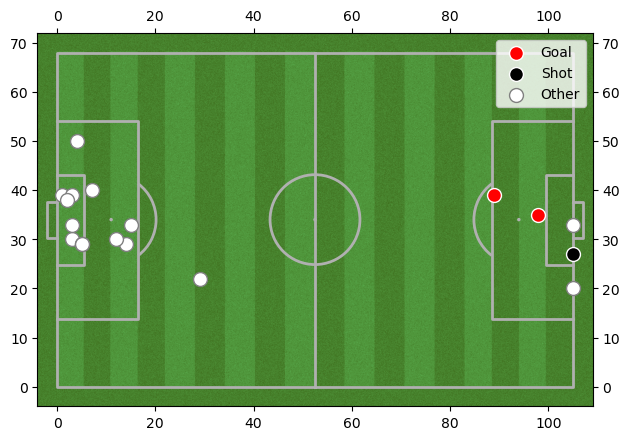

In [45]:

# Filter by outcome
corners_goal = team_corners[team_corners['07 - Outcome'] == 'Goal']
corners_shot = team_corners[team_corners['07 - Outcome'] == 'Shot']
corners_other = team_corners[
    (team_corners['07 - Outcome'] != 'Goal') & 
    (team_corners['07 - Outcome'] != 'Shot')
]
# Draw pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    #half=True, 
    label=True, axis=True, tick=True
)
fig, ax = pitch.draw()

# Plot Goal events in red
ax.scatter(
    corners_goal['15 - End location X'],
    corners_goal['16 - End location Y'],
    c='red', s=100, edgecolors='white', label='Goal'
)

# Plot Shot events in black
ax.scatter(
    corners_shot['15 - End location X'],
    corners_shot['16 - End location Y'],
    c='black', s=100, edgecolors='white', label='Shot'
)

# Plot all other events in white
ax.scatter(
    corners_other['15 - End location X'],
    corners_other['16 - End location Y'],
    c='white', s=100, edgecolors='gray', label='Other'
)

# Add legend and show
plt.legend()
plt.show()

<Axes: xlabel='10 - Players'>

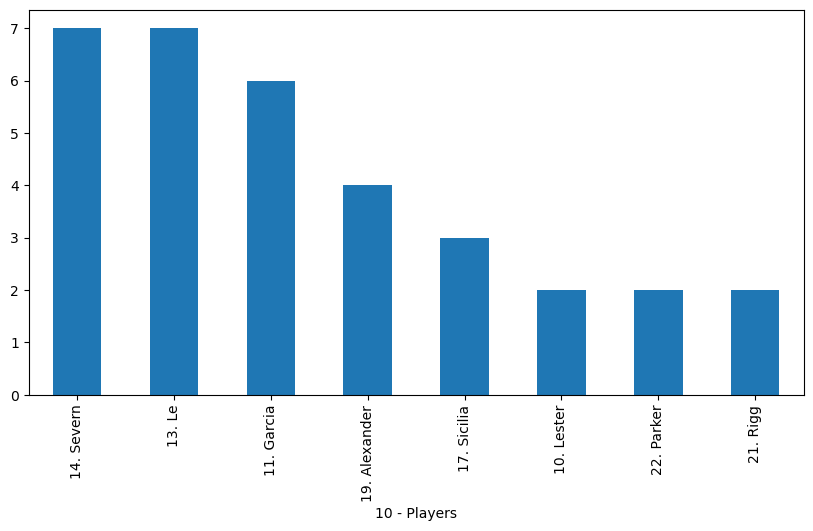

In [46]:
# Who parricipated in corner kicks the most?
team_corners['10 - Players'].str.split(',')\
    .explode().str.strip()\
    .value_counts()\
    .plot(kind='bar', figsize=(10, 5))

## Goal kicks

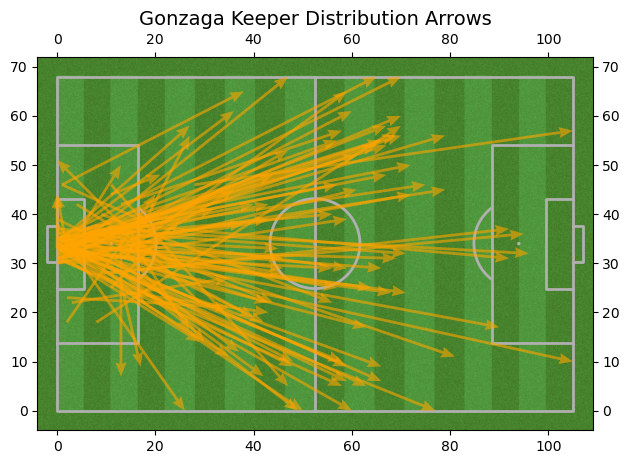

In [47]:
team_keep_distribution = combined_df[(combined_df['code']=='Gonzaga Bulldogs - Goalkeeper distributions')]

# Draw pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    #half=True, 
    label=True, axis=True, tick=True
)
fig, ax = pitch.draw()

# Draw arrows
pitch.arrows(
    xstart=team_keep_distribution['11 - Start location X'],
    ystart=team_keep_distribution['12 - Start location Y'],
    xend=team_keep_distribution['15 - End location X'],
    yend=team_keep_distribution['16 - End location Y'],
    color='orange',
    ax=ax,
    width=2,
    headwidth=4,
    alpha=0.6,
    zorder=3
)

plt.title("Gonzaga Keeper Distribution Arrows", fontsize=14)
plt.show()

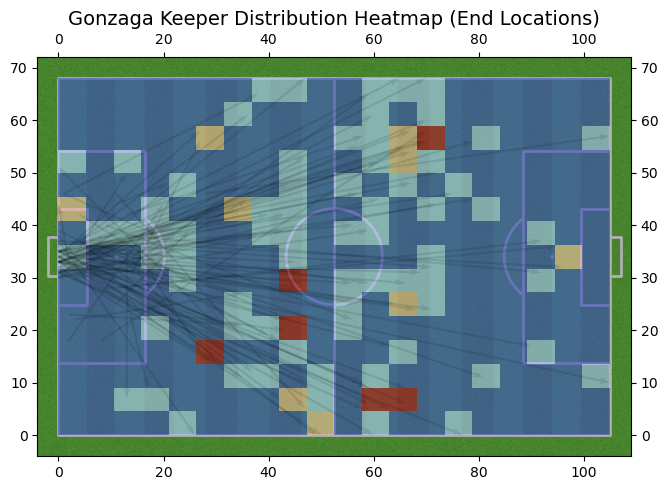

In [48]:



# Extract coordinates
x_start = team_keep_distribution['11 - Start location X']
y_start = team_keep_distribution['12 - Start location Y']
x_end = team_keep_distribution['15 - End location X']
y_end = team_keep_distribution['16 - End location Y']

# Set up the pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    label=True, axis=True, tick=True
)

fig, ax = pitch.draw(figsize=(8, 5))

# Plot heatmap of start locations
bin_stat = pitch.bin_statistic(x_end, y_end, statistic='count', bins=(20, 15))
pitch.heatmap(bin_stat, ax=ax, cmap='coolwarm', alpha=0.6)

# Optional: overlay arrows (lighter and less prominent)
pitch.arrows(
    xstart=x_start,
    ystart=y_start,
    xend=x_end,
    yend=y_end,
    color='black',
    ax=ax,
    width=1.5,
    headwidth=3,
    alpha=0.1,   # Lower alpha to avoid clutter
    zorder=2
)

# Title
plt.title("Gonzaga Keeper Distribution Heatmap (End Locations)", fontsize=14)
plt.show()


<Axes: xlabel='10 - Players'>

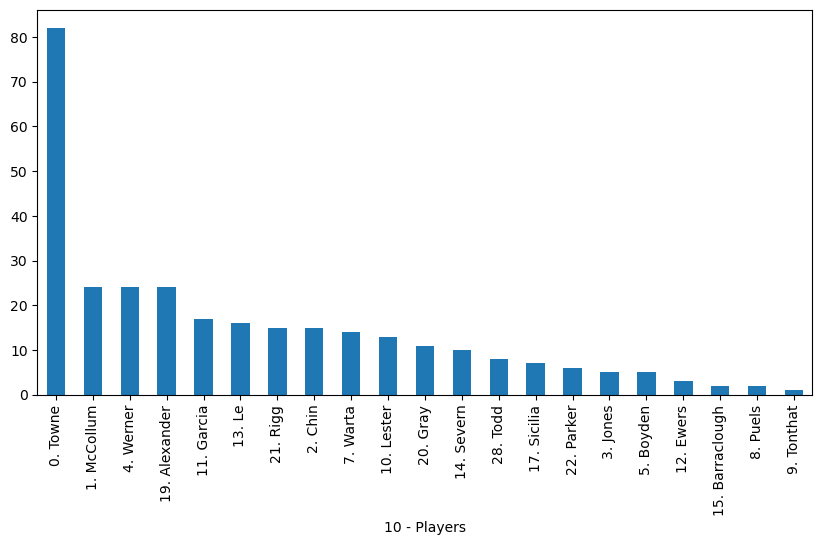

In [49]:
team_keep_distribution['10 - Players'].str.split(',')\
    .explode().str.strip()\
    .value_counts()\
    .plot(kind='bar', figsize=(10, 5))

/var/folders/hd/fbf93pws5pn1ycb22tw5k1240000gn/T/ipykernel_5528/1828311421.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_keep_distribution['end_x'] = team_keep_distribution['03 - End location third'].map(third_to_x)
/var/folders/hd/fbf93pws5pn1ycb22tw5k1240000gn/T/ipykernel_5528/1828311421.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_keep_distribution['end_y'] = team_keep_distribution['04 - End location flank'].map(flank_to_y)


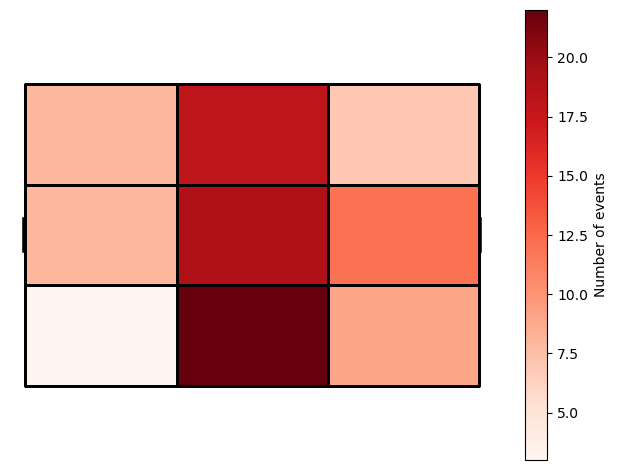

In [50]:
# Mapping for 105x68 pitch
third_to_x = {
    'Own third': 17.5,
    'Middle third': 52.5,
    'Final third': 87.5
}

flank_to_y = {
    'Left flank': 11.33,
    'Center': 34.0,
    'Right flank': 56.67
}

# Map labels to coordinates
team_keep_distribution['end_x'] = team_keep_distribution['03 - End location third'].map(third_to_x)
team_keep_distribution['end_y'] = team_keep_distribution['04 - End location flank'].map(flank_to_y)

# Drop rows where mapping failed (NaN)
team_keep_distribution = team_keep_distribution.dropna(subset=['end_x', 'end_y'])

# Create pitch
pitch = Pitch(pitch_length=105, pitch_width=68, line_color='black')
fig, ax = pitch.draw()

# Bin statistic (matching thirds/flanks)
bin_stat = pitch.bin_statistic(
    team_keep_distribution['end_x'],
    team_keep_distribution['end_y'],
    statistic='count',
    bins=(3, 3)
)

# Plot heatmap
pcm = pitch.heatmap(bin_stat, ax=ax, cmap='Reds', edgecolors='black')

# Add colorbar
cbar = plt.colorbar(pcm, ax=ax)
cbar.set_label('Number of events')

plt.show()

In [51]:
combined_df['03 - End location third'].unique()

array(['Final third', 'Own third', 'Middle third', nan], dtype=object)

In [52]:
combined_df['04 - End location flank'].unique()

array(['Center', 'Left flank', 'Right flank', nan], dtype=object)

In [53]:
team_keep_distribution_indices = team_keep_distribution.index
subset_rows= []
for idx in team_keep_distribution_indices:
    next_rows = team_data.loc[idx:idx+5]
    subset_rows.append(next_rows)

team_keep_distribution_next5 = pd.concat(subset_rows)
team_keep_distribution_next5.head(10)

,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,06 - Number of team events,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
125,126,LMU Lions - Possessions,457.327518,462.327381,Middle third,Left flank,Final third,Center,Short,4 or less,61.0,14.0,5.0,4-3-1-2,24.0,44.0,"4. Dobbs, 7. Harrington, 9. Groves",Medium,NaN,NaN
126,127,LMU Lions - Open play attacks,457.327518,462.327381,Middle third,Left flank,Final third,Center,Short,4 or less,61.0,14.0,5.0,4-3-1-2,24.0,44.0,"4. Dobbs, 7. Harrington, 9. Groves",Medium,NaN,NaN
127,128,Ball in play,462.317381,475.4391,Own third,Center,Middle third,Right flank,Medium,5-9,24.0,44.0,12.0,4-1-4-1,46.0,14.0,"10. Lester, 20. Gray, 7. Warta, 14. Severn",Low,NaN,NaN
128,129,Gonzaga Bulldogs - Possessions,462.317381,475.4391,Own third,Center,Middle third,Right flank,Medium,5-9,24.0,44.0,12.0,4-1-4-1,46.0,14.0,"10. Lester, 20. Gray, 7. Warta, 14. Severn",Low,NaN,NaN
129,130,Ball in play,475.4291,477.935117,Middle third,Left flank,Final third,Left flank,Short,4 or less,46.0,14.0,1.0,4-3-1-2,32.0,54.0,24. Myklebust,Medium,NaN,NaN
130,131,LMU Lions - Possessions,475.4291,477.935117,Middle third,Left flank,Final third,Left flank,Short,4 or less,46.0,14.0,1.0,4-3-1-2,32.0,54.0,24. Myklebust,Medium,NaN,NaN
140,141,Gonzaga Bulldogs - Open play attacks,513.082137,524.445974,Own third,Center,Final third,Left flank,Medium,4 or less,34.0,29.0,11.0,4-1-4-1,34.0,54.0,"4. Werner, 11. Garcia, 21. Rigg, 19. Alexander",Low,NaN,NaN
141,142,Ball in play,524.435974,542.012751,Own third,Right flank,Final third,Center,Medium,5-9,34.0,54.0,16.0,4-3-1-2,27.0,26.0,"10. Winter, 16. Schaefer, 9. Groves, 24. Myklebust, 19. McCulloch",Low,NaN,NaN
142,143,LMU Lions - Possessions,524.435974,542.012751,Own third,Right flank,Final third,Center,Medium,5-9,34.0,54.0,16.0,4-3-1-2,27.0,26.0,"10. Winter, 16. Schaefer, 9. Groves, 24. Myklebust, 19. McCulloch",Low,NaN,NaN
143,144,Ball in play,542.002751,565.542767,Own third,Center,Final third,Center,Medium,5-9,27.0,26.0,18.0,4-1-4-1,17.0,39.0,"4. Werner, 11. Garcia, 13. Le, 7. Warta",Low,NaN,NaN


In [54]:
# Step 1: Filter for Goal kicks by Gonzaga
goal_kicks = player_data[
    (player_data['Action Type'] == 'Goal kick') &
    (player_data['Team'] == 'Gonzaga')
]

# Step 2: Get indices of those rows
goal_kick_indices = goal_kicks.index

# Step 3: Collect each row and the next 5 rows
subset_rows = []

for idx in goal_kick_indices:
    # Get current and next 5 rows (handle end-of-DataFrame edge case)
    next_rows = player_data.loc[idx:idx+5]
    subset_rows.append(next_rows)

# Step 4: Combine all into one DataFrame
goal_kick_sequences = pd.concat(subset_rows).drop_duplicates()

# Optional: sort by original index
goal_kick_sequences = goal_kick_sequences.sort_index()

# Display
goal_kick_sequences

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
108,109,0. Towne,338.314590,342.314590,Goal kick,"Goalkeeper action, Loss",Gonzaga
109,110,10. Winter,340.478256,345.478256,Pass,"Forward pass, Recovery, Counterpressing recovery, Short or medium pass",LMU
110,111,9. Groves,342.265986,347.265986,Pass,"Back pass, Short or medium pass",LMU
111,112,10. Winter,343.124765,348.124765,Pass,"Forward pass, Loss, Pass to penalty area, Short or medium pass",LMU
112,113,4. Werner,344.199856,349.764941,Pass,"Forward pass, Loss, Progressive pass, Short or medium pass",Gonzaga
113,114,16. Schaefer,346.764941,352.946336,Pass,"Lateral pass, Pass to final third, Recovery, Counterpressing recovery, Short or medium pass",LMU
369,370,0. Towne,1135.814984,1139.814984,Goal kick,Goalkeeper action,Gonzaga
370,371,10. Winter,1142.166585,1146.166585,Duel,"Defensive duel, Dribbled past attempt, Ground duel",LMU
371,372,19. Alexander,1142.166585,1146.166585,Duel,"Dribble, Ground duel, Offensive duel, Carry",Gonzaga
372,373,19. Alexander,1144.595569,1149.595569,Pass,"Lateral pass, Loss, Progressive pass, Short or medium pass",Gonzaga


In [55]:
player_data.head(55)

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
0,1,13. Le,3.184460,8.184460,Pass,"Forward pass, Short or medium pass",Gonzaga
1,2,7. Warta,4.770350,11.855952,Pass,"Lateral pass, Pass to final third, Short or medium pass",Gonzaga
2,3,19. McCulloch,9.855952,13.855952,Duel,"Defensive duel, Ground duel, Recovery",LMU
3,4,14. Severn,9.855952,13.855952,Duel,"Ground duel, Loss, Offensive duel",Gonzaga
4,5,19. McCulloch,11.577991,15.577991,Duel,"Ground duel, Offensive duel",LMU
5,6,14. Severn,11.577991,15.577991,Duel,"Defensive duel, Ground duel",Gonzaga
6,7,14. Severn,17.681888,21.681888,Throw in,,Gonzaga
7,8,13. Le,19.907523,26.613645,Pass,"Lateral pass, Short or medium pass",Gonzaga
8,9,20. Gray,23.613645,29.040995,Pass,"Lateral pass, Short or medium pass",Gonzaga
9,10,13. Le,26.040995,32.643144,Pass,"Back pass, Short or medium pass",Gonzaga
